<a href="https://colab.research.google.com/github/jencooh/869_course/blob/main/MMA_GMMA_2022_869_JennyOh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- Jenny, Oh
- 20312150
- 1
- 1984
- 2021/12/12

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
print(datetime.datetime.now())

2021-12-12 20:43:37.062815


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
#pip install unidecode
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [ ]:
X = df1.copy()

In [ ]:
scaler = StandardScaler()
features = ['Age', 'Income', 'SpendingScore', 'Savings']
X[features] = scaler.fit_transform(X[features])

In [ ]:
X.shape
X.info()
X.describe().transpose()

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-1.954432e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-4.058360e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


## 1.1: Clustering Algorithm #1

In [ ]:
#clustering without scaling
k_means = KMeans(n_clusters = 5, random_state = 42)
k_means.fit(df1)

KMeans(n_clusters=5, random_state=42)

In [ ]:
label_0 = k_means.labels_
label_0

array([2, 2, 2, 2, 0, 4, 2, 0, 0, 0, 3, 1, 1, 3, 2, 4, 2, 0, 0, 3, 1, 4,
       2, 0, 3, 4, 4, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 3, 2, 0, 4, 2,
       2, 4, 3, 4, 1, 2, 0, 1, 4, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 4, 4, 2, 2, 3, 0, 0, 3, 2, 1, 2, 2, 4, 2, 3, 1, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 4, 0, 2, 4, 1, 2, 2, 3, 3, 4, 3, 4, 1, 0, 0, 3, 3, 2,
       0, 1, 2, 1, 1, 1, 2, 3, 4, 0, 1, 0, 0, 0, 3, 3, 2, 0, 2, 2, 3, 2,
       1, 2, 4, 0, 4, 4, 2, 3, 0, 2, 2, 4, 2, 4, 2, 4, 2, 0, 2, 3, 0, 2,
       0, 3, 3, 2, 0, 2, 3, 0, 2, 1, 0, 1, 0, 2, 3, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 3, 4, 4, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 4, 3,
       0, 0, 0, 1, 2, 1, 2, 3, 2, 0, 4, 2, 0, 0, 0, 0, 2, 0, 1, 4, 1, 0,
       2, 2, 3, 0, 3, 4, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 3, 1, 4, 2,
       2, 2, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 0, 0, 1, 3, 2, 2, 3, 2, 2, 0,
       2, 0, 3, 4, 2, 3, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 3, 4, 3, 0,
       0, 1, 3, 0, 0, 4, 2, 3, 3, 2, 3, 0, 0, 1, 2,

In [ ]:
#Check silhouette score and ch
sil = silhouette_score(df1, label_0,  metric='euclidean')
ch = calinski_harabasz_score(df1, label_0)

print(sil)
print(ch)

0.6782348405719981
4683.873383897563


In [ ]:
# Using K-Means Clustering after scaling
k_means1 = KMeans(n_clusters = 4, random_state = 42)
k_means1.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
label_1 = k_means1.labels_
label_1

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0,
       1, 2, 0, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 0, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 0, 1, 2, 1, 0, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 0, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [ ]:
k_means1.cluster_centers_

array([[-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

In [ ]:
#Check silhouette score and ch
sil1 = silhouette_score(X, label_1,  metric='euclidean')
ch1 = calinski_harabasz_score(X, label_1)

print(sil)
print(ch)

0.6782348405719981
4683.873383897563


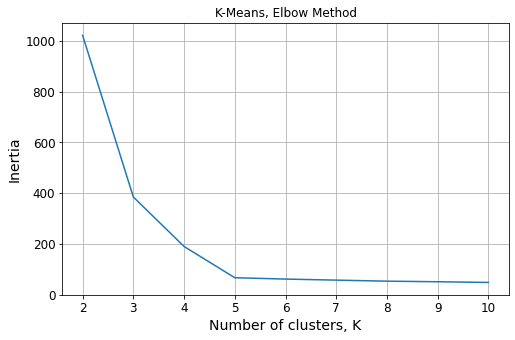

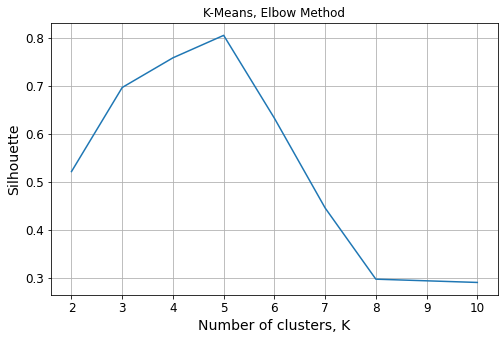

In [ ]:
#Hyperparameter Tuning with Elbow Method

inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");


Decide to use k=5

In [ ]:
# Using K-Means Clustering with k=5
k_means2 = KMeans(n_clusters = 5, random_state = 42)
k_means2.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
label_2 = k_means2.labels_
label_2

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [ ]:
k_means2.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [ ]:
#Check silhouette score and ch
sil2 = silhouette_score(X, label_2,  metric='euclidean')
ch2 = calinski_harabasz_score(X, label_2)

print(sil2)
print(ch2)

0.8048976287755765
3671.358018517615


Use improved clustering model with k=5

In [ ]:
#cluster means with inverse transform
k_means_personas = pd.DataFrame(scaler.inverse_transform(k_means2.cluster_centers_),columns=['Age','Income','Spending Score','Savings'])
k_means_personas

,Age,Income,Spending Score,Savings
0,32.777778,105265.809524,0.309926,14962.778066
1,59.955414,72448.063694,0.771518,6889.972190
2,87.775510,27866.102041,0.328800,16659.261445
3,24.180000,128029.120000,0.896892,4087.520309
4,86.000000,119944.040000,0.068378,14808.683793


In [ ]:
#Example instances - personas
np.set_printoptions(suppress=True)

for label in set(label_2):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(X[label_2==label].head()))


Cluster 0:
[[    36.          99780.              0.26543261  16398.40133318]
 [    30.          99949.              0.34467922  13621.63972633]
 [    31.         107963.              0.29050863  13407.08139103]
 [    30.         101073.              0.31438712  14324.55597712]
 [    33.         101058.              0.31508155  14911.86839821]]

Cluster 1:
[[   58.         77769.             0.79132878  6559.829923  ]
 [   59.         81799.             0.79108205  5417.6614262 ]
 [   62.         74751.             0.70265695  9258.99296503]
 [   59.         74373.             0.76567956  7346.33450354]
 [   54.         76500.             0.78519785  6878.88424855]]

Cluster 2:
[[   87.         17760.             0.34877755 16869.5071303 ]
 [   87.         42592.             0.35528968 18086.28715786]
 [   83.         34384.             0.32471868 14783.37908579]
 [   84.         27693.             0.36706297 17879.55890555]
 [   87.         31481.             0.31742397 16180.6880820

In [ ]:
#Feature Stats for each cluster

Q1X1_df = pd.DataFrame(scaler.inverse_transform(X), columns=['Age','Income','Spending Score','Savings'])
Q1X1_df['Cluster'] = label_2

cl_group = Q1X1_df.groupby(['Cluster']).agg('describe')

cl_group['Age']
cl_group['Income']
cl_group['Spending Score']
cl_group['Savings']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.0,32.777778,3.792390,22.0,30.0,33.0,35.0,44.0
1,157.0,59.955414,3.376662,51.0,58.0,59.0,62.0,68.0
2,147.0,87.775510,3.508885,79.0,85.0,88.0,91.0,97.0
3,50.0,24.180000,3.662775,17.0,22.0,24.5,27.0,31.0
4,25.0,86.000000,3.662877,77.0,84.0,86.0,88.0,93.0


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.0,105265.809524,6080.621753,89598.0,100760.25,106002.5,108858.75,119877.0
1,157.0,72448.063694,6240.260008,56321.0,68463.00,72027.0,76594.00,90422.0
2,147.0,27866.102041,6448.805481,12000.0,23361.00,27771.0,32601.00,46977.0
3,50.0,128029.120000,5688.904656,117108.0,123042.00,128162.0,131435.75,142000.0
4,25.0,119944.040000,4941.052254,110582.0,117347.00,119429.0,123651.00,128596.0


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.0,0.309926,0.045513,0.174120,0.281237,0.309479,0.341096,0.411112
1,157.0,0.771518,0.046058,0.657314,0.740367,0.766720,0.800598,0.910417
2,147.0,0.328800,0.045224,0.203140,0.301502,0.324719,0.357267,0.473550
3,50.0,0.896892,0.043466,0.806553,0.871957,0.890676,0.926473,1.000000
4,25.0,0.068378,0.039744,0.000000,0.036795,0.063273,0.082723,0.155694


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.0,14962.778066,1061.734017,12207.526078,14223.787562,14976.943192,15682.288845,17968.553929
1,157.0,6889.972190,1052.276354,4077.658657,6225.376082,6845.056822,7497.231607,10547.775368
2,147.0,16659.261445,1183.850178,13470.970605,15957.282919,16711.067980,17433.126684,20000.000000
3,50.0,4087.520309,1277.754801,0.000000,3275.320193,4361.967019,4986.863329,6089.478323
4,25.0,14808.683793,1159.339639,12554.692742,14047.388986,14773.407206,15391.952192,17833.093470


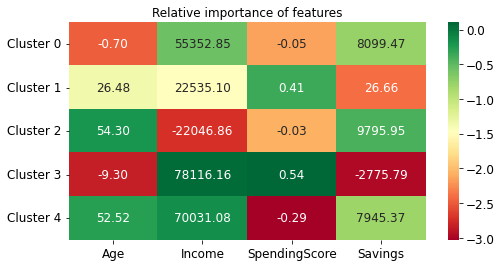

In [ ]:
#Relative Importance of Features

col_names = df1.columns

all_means = label_2.mean(axis=0)

relative_imp = k_means2.cluster_centers_ - all_means

plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=scaler.inverse_transform(relative_imp), 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(5)]);

## 1.2: Clustering Algorithm #2

In [ ]:
# Using DBSCAN with min_samples = 8 (4 features * 2)
db = DBSCAN(eps=0.3, min_samples = 8)
db.fit(X)

DBSCAN(eps=0.3, min_samples=8)

In [ ]:
label_3 = db.labels_
label_3

array([ 0,  0,  0,  0,  1,  4,  0,  1,  1,  1,  3,  2,  2,  2,  0,  3,  0,
        1,  1,  3,  2,  3,  0,  1, -1,  4,  4,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1,  4,  0,  0,  4,  3,  4,  2,  0,  1,
        2,  4,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  4,
        4,  0,  0,  2,  1,  1,  2,  0,  2,  0,  0,  4,  0, -1,  0,  1,  1,
        2,  2,  0,  0,  0,  0,  0,  4,  1,  0,  4,  2,  0,  0,  2,  2,  4,
        2,  4,  2,  1, -1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2, -1,
        1,  2,  1,  1,  1,  2,  3,  0,  1,  0,  0,  2,  0,  2,  0,  4,  1,
        3,  4,  0,  2,  1,  0,  0,  4,  0,  4,  0,  3,  0,  1,  0,  2,  1,
        0,  1,  3,  2,  0,  1,  0,  2,  1,  0,  2, -1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2,  4,  4,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1, -1,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  4,  0,  1,  1, -1,  1,  0,  1,  2,  4,  2,  1,  0,
        0,  2,  1,  2,  4

In [ ]:
sil3 = silhouette_score(X, label_3)
ch3 = calinski_harabasz_score(X, label_3)

print(sil3)
print(ch3)

0.7397673147962858
996.8843778962829


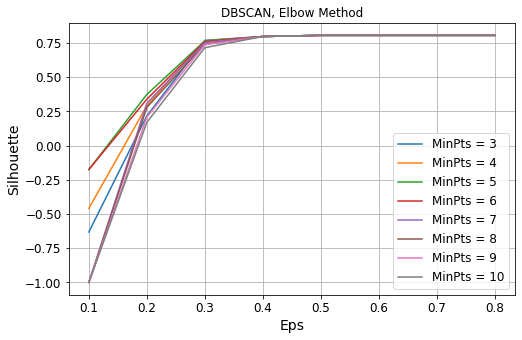

In [ ]:
#DBSCAN hyperparameter tuning with Elbow Method
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();

Decide to use eps = 0.4, and keep min_samples = 8

In [ ]:
# Using DBSCAN with min_samples = 8 (4 features * 2) and eps = 0.4
db2 = DBSCAN(eps=0.4, min_samples = 8)
db2.fit(X)

DBSCAN(eps=0.4, min_samples=8)

In [ ]:
label_4 = db2.labels_
label_4

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1,  3,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0,  3,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4,  1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1,  2,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [ ]:
sil4 = silhouette_score(X, label_4)
ch4 = calinski_harabasz_score(X, label_4)

print(sil4)
print(ch4)

0.7965062016314277
2191.7325157700852


In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(label_4)) - (1 if -1 in label_4 else 0)
n_noise_ = list(label_4).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 3


In [ ]:
#count of customers in each cluster
np.unique(label_4, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([  3, 157, 146,  49,  24, 126]))

In [ ]:
print(X)

          Age    Income  SpendingScore   Savings
0   -0.042287  0.062733       1.103593 -1.072467
1   -0.000821  0.174811       1.102641 -1.303473
2    0.123577 -0.021200       0.761727 -0.526556
3   -0.000821 -0.031712       1.004705 -0.913395
4    1.160228 -1.606165      -0.602619  1.012686
..        ...       ...            ...       ...
500 -1.286268  0.714535      -0.453557  0.621787
501  1.409024 -1.545704      -1.164109  1.235201
502  1.284626 -1.118447      -0.578054  0.855313
503  1.326092 -1.524929      -0.579866  1.322452
504  1.243160 -1.258335      -0.831890  0.510463

[505 rows x 4 columns]


In [ ]:
#Feature Stats for each cluster

Q1X2_df = pd.DataFrame(scaler.inverse_transform(X), columns=['Age','Income','Spending Score','Savings'])
Q1X2_df['Cluster'] = label_4

cl_group1 = Q1X2_df.groupby(['Cluster']).agg('describe')

cl_group1['Age']
cl_group1['Income']
cl_group1['Spending Score']
cl_group1['Savings']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
-1,3.0,64.666667,41.283572,17.0,52.50,88.0,88.50,89.0
0,157.0,59.955414,3.376662,51.0,58.00,59.0,62.00,68.0
1,146.0,87.767123,3.519485,79.0,85.00,88.0,91.00,97.0
2,49.0,24.326531,3.549576,17.0,22.00,25.0,27.00,31.0
3,24.0,85.916667,3.717370,77.0,83.75,85.5,88.25,93.0
4,126.0,32.777778,3.792390,22.0,30.00,33.0,35.00,44.0


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
-1,3.0,91340.333333,58722.976613,24520.0,69643.50,114767.0,124750.50,134734.0
0,157.0,72448.063694,6240.260008,56321.0,68463.00,72027.0,76594.00,90422.0
1,146.0,27889.020548,6464.994528,12000.0,23341.50,27965.5,32654.50,46977.0
2,49.0,127892.285714,5664.114560,117108.0,123005.00,127699.0,131009.00,142000.0
3,24.0,120159.750000,4925.609450,110582.0,117509.75,119563.0,123780.75,128596.0
4,126.0,105265.809524,6080.621753,89598.0,100760.25,106002.5,108858.75,119877.0


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
-1,3.0,0.444654,0.412858,0.032208,0.238020,0.443833,0.650877,0.857922
0,157.0,0.771518,0.046058,0.657314,0.740367,0.766720,0.800598,0.910417
1,146.0,0.328013,0.044356,0.203140,0.301438,0.324456,0.356635,0.473550
2,49.0,0.897687,0.043547,0.806553,0.872736,0.890891,0.926818,1.000000
3,24.0,0.069885,0.039862,0.000000,0.039817,0.066026,0.084962,0.155694
4,126.0,0.309926,0.045513,0.174120,0.281237,0.309479,0.341096,0.411112


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
-1,3.0,10463.343118,9310.346010,0.000000,6778.467942,13556.935883,15695.014677,17833.093470
0,157.0,6889.972190,1052.276354,4077.658657,6225.376082,6845.056822,7497.231607,10547.775368
1,146.0,16680.510250,1159.455393,13470.970605,15998.732013,16713.113999,17446.653017,20000.000000
2,49.0,4170.939090,1145.202047,610.446219,3290.829469,4371.234733,5011.112062,6089.478323
3,24.0,14682.666723,994.101308,12554.692742,14035.603981,14638.408996,15378.837513,16840.570584
4,126.0,14962.778066,1061.734017,12207.526078,14223.787562,14976.943192,15682.288845,17968.553929


## 1.3 Model Comparison

Based on silouette and calinski harabasz scores, K-Means clustering with 5 clusters have the highest score, meaning that the clusters are farthest away and the ost dispersed compared to other algorithms.
Both K-means and DBSCAN were easy to use, but DBSCAN can be easier as you don't have to determine the optimal number of clusters. They were both quick to run for our data this time.

DBSCAN resulted in 3 outliers that were not included in any of the clusters, whereas K-Means clustering included all customer. DBSCAN might be helpful when determining outliers, but by quickly looking at the mean age, income, spending score, and savings, resulting personas seemed similar, so K-means clustering was used as the final algorithm.

## 1.4 Personas

There are 5 personas based on K-means clustering. 

1) "Young & Rich" (cluster 0) are customers around the age of 33, who have high income and large savings. Their spedning score is low likely because they are still young and only purchases when neccessary, so they only purchased once or very few times at our store.

  example customer: Age 33, Income CAD 105,266, Spending Score 0.31, Savings $14,963

2) "High Spenders" (cluster 1) are around middle age with high spending score, but not so high income and savings amount. Based on their income, they're not likely to impulse buy from our store, but in special occassion, they purchased and are likely to purchse. As their income is not too high, they are likely to respond to deals.

  Example customer: Age 60, income CAD 72,448, Spending Score 0.77, Savings $6,890

3) "Retired - average" (cluster 2) are elders with low income but high savings. They also have low spending score, but not as extremem as some others. They are likely living on their retirement savings balance, so they are less likely to impulse buy, but may respond to deals.

Example customer: Age 88, income CAD27,866, Spending score 0.33, savings $16,660

4) "YOLO" (cluster 3) are very young and high income customers but without high savings. They likely purchase impulsively as their spending score is high but savings are low. The store is likely to be able to attract these customers with loyalty points and target advertisement as they are likely to purchase.

  Example customer: Age 24, income CAD 128,029 Spending score 0.90, savings $4,087

5) "Retired - flugal" (cluster 4) are not likely to purchase a lot from our store. They have high income and high savings, but their spending score is extremely low and they are likely retired elders. Doing advertisement or loyalty program might not be effective to these customers as their spending habbit is already set.

  Example customers: Age 86, income CAD 119,944, spending score 0.07, savings $14,809

---



# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

{frozen pizza} -> {coke} would have high support and high confidence as frozen pizza and coke purchase would occur often and when frozen pizza is bought, customers are likely to buy coke as well. This rule might not be as interesting, because it is also very common, so he would have already noticed this rule.


## 2.2: A rule that might have reasonably high support but low confidence.

{Apple} -> {banana} would have a reasonably high support but low confidence. They are both common fruits, so purchasing apple and banana would occur often, but purchasing apple would not neccessarily mean they will also purchase banana as well. This information is also not as interesting since they are both very common fruits, so they are usually already placed near each other in the produce/fruit section in stores.


## 2.3: A rule that might have low support and low confidence.

{cat toy} -> {hypoallergenic shampoo} would have low support as cat food and aypoallergenic shampoo would not occur often. It would also have low confidence as when cat toy is purchased, the person is not likely to purchase hypoallergenic shampoo since they are likle to have allergies and it could include cat allergy. It might be interesting to Uncle Steve, because if a customer is looking for hypoallergenic products, they likely do not want to be near animal products nor strongly scented products. So Uncle Steve should place hypoallergenic products far away from other products.


## 2.4: A rule that might have low support and high confidence.

{birthday cake} -> {birthday candles} would have low support as not many customers purchase bithday cakes and candles from grocery store on a daily basis compared to total transactions. However, when a customer purchase a cake, they are likely to also purchase candles at the same store. This can be interesting as Uncle Steve so he can place birthday candel stand next to the cakes.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [ ]:
df3.head(5)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08


In [ ]:
#Check for missing data
X_train.isnull().sum()

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

In [ ]:
#encoding categorical variables
from sklearn.preprocessing import LabelEncoder

X_train1 = X_train.drop('UserID', axis=1)

label_encoder = LabelEncoder()

train_str = X_train1.select_dtypes(include = ['object'])
train_num = X_train1.select_dtypes(exclude = ['object'])

for feat in train_str:
    train_str[feat] = label_encoder.fit_transform(train_str[feat].astype(str))

enc_train = pd.concat([train_num,train_str], axis=1)
enc_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   PreviousDefault    4800 non-null   int64
 1   NumberPets         4800 non-null   int64
 2   PreviousAccounts   4800 non-null   int64
 3   ResidenceDuration  4800 non-null   int64
 4   Amount             4800 non-null   int64
 5   Married            4800 non-null   int64
 6   Duration           4800 non-null   int64
 7   Sex                4800 non-null   int64
 8   FirstName          4800 non-null   int64
 9   LastName           4800 non-null   int64
 10  Street             4800 non-null   int64
 11  LicensePlate       4800 non-null   int64
 12  City               4800 non-null   int64
 13  Purpose            4800 non-null   int64
 14  DateOfBirth        4800 non-null   int64
dtypes: int64(15)
memory usage: 600.0 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
#Base Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier(
    random_state=0)
clf_rf.fit(enc_train, y_train)

scores = cross_val_score(clf_rf, enc_train, y_train, cv = 15, scoring = 'f1_macro')
scores

RandomForestClassifier(random_state=0)

array([0.81037037, 0.77893538, 0.78666667, 0.75467359, 0.76720501,
       0.72457415, 0.76698594, 0.83596286, 0.7582067 , 0.79241611,
       0.73423467, 0.80283426, 0.76305747, 0.76720501, 0.78367938])

In [ ]:
print(scores.mean())

0.7751338372065782


## 3.2: Feature engineering

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


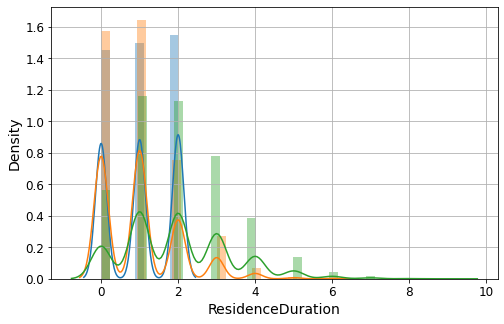

In [ ]:
#See Distribution plots

sns.distplot(X_train1.NumberPets)

sns.distplot(X_train1.PreviousAccounts)

sns.distplot(X_train1.ResidenceDuration)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


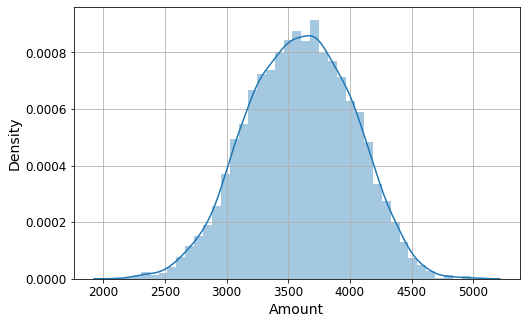

In [ ]:
sns.distplot(X_train1.Amount)

Decide to log amount and scale numeric values based on the distribution and the values being so different (0,1 and then 3500 for amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


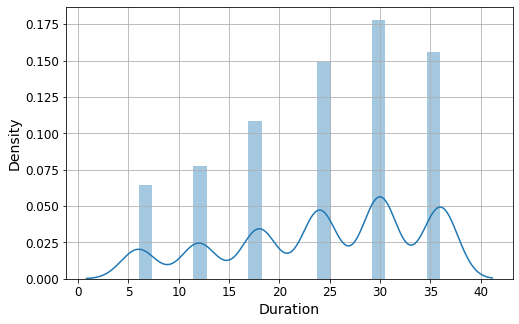

In [ ]:
sns.distplot(X_train1.Duration)

In [ ]:
X_dateofbirth = X_train.DateOfBirth
X_train2 = X_train.drop(['UserID','DateOfBirth'], axis=1)


train_str = X_train2.select_dtypes(include = ['object'])
train_num = X_train2.select_dtypes(exclude = ['object'])

for feat in train_str:
    train_str[feat] = label_encoder.fit_transform(train_str[feat].astype(str))

enc_train1 = pd.concat([train_num,train_str,X_dateofbirth], axis=1)
enc_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreviousDefault    4800 non-null   int64 
 1   NumberPets         4800 non-null   int64 
 2   PreviousAccounts   4800 non-null   int64 
 3   ResidenceDuration  4800 non-null   int64 
 4   Amount             4800 non-null   int64 
 5   Married            4800 non-null   int64 
 6   Duration           4800 non-null   int64 
 7   Sex                4800 non-null   int64 
 8   FirstName          4800 non-null   int64 
 9   LastName           4800 non-null   int64 
 10  Street             4800 non-null   int64 
 11  LicensePlate       4800 non-null   int64 
 12  City               4800 non-null   int64 
 13  Purpose            4800 non-null   int64 
 14  DateOfBirth        4800 non-null   object
dtypes: int64(14), object(1)
memory usage: 600.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#Pipeline1

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

numeric_features = ['PreviousDefault', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration']

# Date of birth to age
def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)

clf = RandomForestClassifier(random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ])


preprocessor1 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            (('amount_log', FunctionTransformer(np.log10, validate=False), ['Amount'])),
            ('age', FunctionTransformer(get_age_years, validate=False), 'DateOfBirth')]))
      ])

pipe1 = Pipeline(steps=[('preprocessor', preprocessor1),  ('clf', clf)])

scores1 = cross_val_score(pipe1, enc_train1, y_train, scoring='f1_macro', cv = 15)




In [ ]:
scores1
print(scores1.mean())


array([0.80926106, 0.78117164, 0.75899631, 0.73423467, 0.79241611,
       0.7469689 , 0.75125433, 0.83480196, 0.75895703, 0.8072144 ,
       0.73039216, 0.78835979, 0.69262436, 0.76300566, 0.77893538])

0.7685729162728813


F1 score improved by 0.01 from the base model

## 3.3: Feature selection

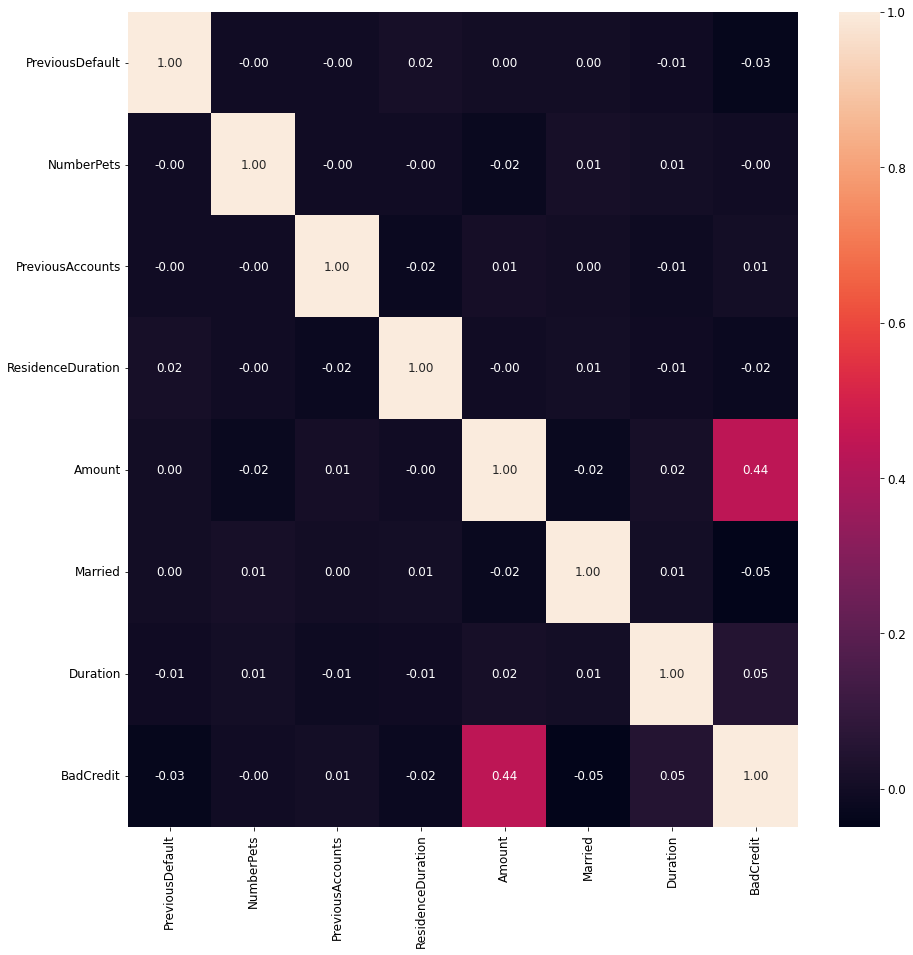

In [ ]:
#see correlation
train = pd.concat([X_train, y_train], axis=1)

corr=train.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr,xticklabels=True, yticklabels=True, annot=True, fmt=".2f")
plt.show()

Not too many correlated numeric variables, decide to drop some features

In [ ]:
#see what are top 2 features 

from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =2)
selector.fit(enc_train, y_train)
enc_train.columns[selector.get_support()]

SelectKBest(k=2, score_func=<function mutual_info_regression at 0x7f199b17b7a0>)

Index(['Amount', 'DateOfBirth'], dtype='object')

In [ ]:
numeric_features = ['PreviousDefault', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration']

drop_features = ['NumberPets','FirstName', 'LastName']

# Date of birth to age
def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)

clf = RandomForestClassifier(random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ])

preprocessor2 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('amount_scale', StandardScaler(), ['Amount']),
            ('age', FunctionTransformer(get_age_years, validate=False), 'DateOfBirth'),
            ('drop', 'drop', drop_features)]))
      ])

pipe2 = Pipeline(steps=[('preprocessor', preprocessor2),  ('clf', clf)])

scores2 = cross_val_score(pipe2, enc_train1, y_train, scoring='f1_macro', cv = 15)



In [ ]:
scores2
print(scores2.mean())


array([0.80519481, 0.78117164, 0.75899631, 0.73423467, 0.79241611,
       0.73875567, 0.75125433, 0.83480196, 0.75895703, 0.8072144 ,
       0.73039216, 0.78835979, 0.69262436, 0.76300566, 0.77893538])

0.7677542844087452


F1 score didn't improve, it declined slightly

## 3.4: Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

numeric_features = ['PreviousDefault', 'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration']

drop_features = ['NumberPets','FirstName', 'LastName']

# Date of birth to age
def get_age_years(feature):
  res = np.array([])
  for instance in feature:
    age = 2021 - int(instance[0:4])
    res = np.append(res, age)
  return res.reshape(-1, 1)

clf = RandomForestClassifier(random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ])

preprocessor3 = Pipeline(steps=[
      ('ct', ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('amount_scale', StandardScaler(), ['Amount']),
            ('age', FunctionTransformer(get_age_years, validate=False), 'DateOfBirth'),
            ('drop', 'drop', drop_features)],
            remainder = 'passthrough', 
            sparse_threshold=0)),
      ('feature_selector', SelectKBest(k=10)),
    ])

pipe3 = Pipeline(steps=[('preprocessor', preprocessor3),  ('clf', clf)])

param_grid = {
    'preprocessor__ct__num__scaler__with_mean': [True, False],
    'preprocessor__ct__num__scaler__with_std': [True, False],
    'preprocessor__feature_selector__k': [5, 10, 14],
    'clf__max_depth': [None, 3, 10],
    'clf__criterion': ['gini', 'entropy'], 
    'clf__class_weight':[None, 'balanced'],
}

pipe3 = GridSearchCV(pipe3, param_grid, cv=15, n_jobs=-1, 
                     scoring='f1_macro', return_train_score=True, verbose=2, error_score='raise')

pipe3 = pipe3.fit(enc_train1, y_train)


print(pipe3.best_score_)
print(pipe3.best_params_)


Fitting 15 folds for each of 144 candidates, totalling 2160 fits
0.7970210364003297
{'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'preprocessor__ct__num__scaler__with_mean': True, 'preprocessor__ct__num__scaler__with_std': True, 'preprocessor__feature_selector__k': 5}


Model improved by 0.03 of F1 score.

## 3.5: Performance estimation

In [ ]:
#Using Test DAta

X_test_dateofbirth = X_test.DateOfBirth
X_test1 = X_test.drop(['UserID','DateOfBirth'], axis=1)


test_str = X_test1.select_dtypes(include = ['object'])
test_num = X_test1.select_dtypes(exclude = ['object'])

for feat in test_str:
    test_str[feat] = label_encoder.fit_transform(test_str[feat].astype(str))

enc_test = pd.concat([test_num,test_str,X_test_dateofbirth], axis=1)
enc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1782 to 1765
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreviousDefault    1200 non-null   int64 
 1   NumberPets         1200 non-null   int64 
 2   PreviousAccounts   1200 non-null   int64 
 3   ResidenceDuration  1200 non-null   int64 
 4   Amount             1200 non-null   int64 
 5   Married            1200 non-null   int64 
 6   Duration           1200 non-null   int64 
 7   Sex                1200 non-null   int64 
 8   FirstName          1200 non-null   int64 
 9   LastName           1200 non-null   int64 
 10  Street             1200 non-null   int64 
 11  LicensePlate       1200 non-null   int64 
 12  City               1200 non-null   int64 
 13  Purpose            1200 non-null   int64 
 14  DateOfBirth        1200 non-null   object
dtypes: int64(14), object(1)
memory usage: 150.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
pipe3.score(enc_test, y_test)

0.812564597085889

Model performed consistently with the training set with 0.797 F1 score compared to the test one resulting 0.812

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



# Uncle Steve would have spent approximately CAD 5,120,000 (five million dollars) last year fixing 256 turbines each costing 'CAD $20,000' to fix.

Random Forest model will have higher savings in cost of approximately CAD 3.49 million compared to the RNN model which will have $3.36 million. This is because Random Forest model has a better precision that when the model predicts it will fail, it does indeed fail at a higher rate (lower false positives). However, RNN model has a better recall, which means that when the model avoids actual fails that are predicted as no fail (lower false negatives). This might make us believe that RNN is better as it will avoid the situation that turbine fails when we didn't predict it. However, RNN resulted in a significantly higher number of turbines that are predicted as fail but did not actually fail. So the cost using RNN was increased significantly due to the flat CAD 500 cost of all the turbines that were falsely predicted as fail.

Therefore, the Random Forest model will result in higher savings for Uncle Steve.

# Cost matrix would be as follows:
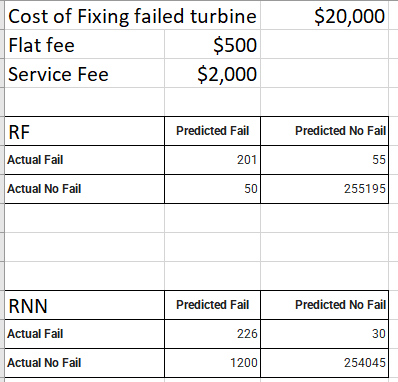

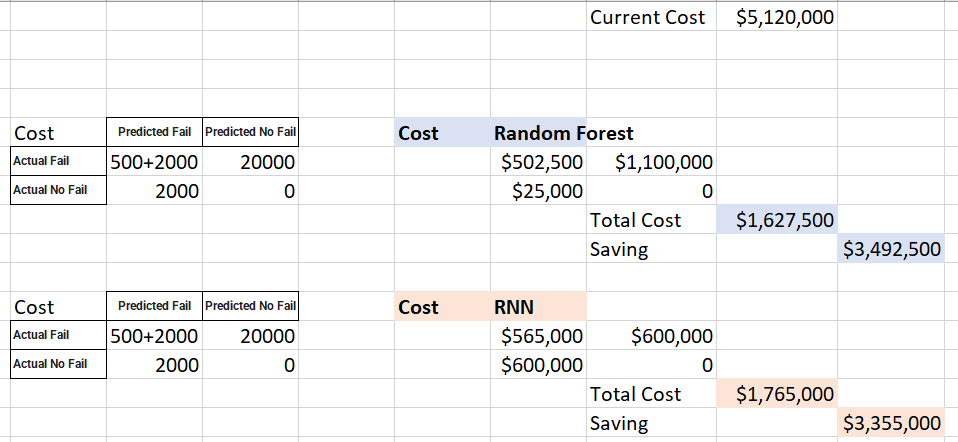